In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
prsa_data = pd.read_csv("/content/PRSA_Data.csv")
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,-1.0,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,-1.0,-1.000000,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,-1.0,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


In [ ]:
prsa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35064 non-null  int64  
 1   No          35064 non-null  int64  
 2   SO2         35064 non-null  float64
 3   NO2         35064 non-null  float64
 4   CO          35064 non-null  float64
 5   O3          35064 non-null  float64
 6   PRES        35064 non-null  float64
 7   RAIN        35064 non-null  float64
 8   wd          35064 non-null  object 
 9   WSPM        35064 non-null  float64
 10  AQI Label   35064 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 2.9+ MB


In [ ]:
prsa_data.describe()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17531.500000,17532.500000,18.058734,63.236861,1251.121692,45.876835,1010.520250,0.067653,1.500217
std,10122.249256,10122.249256,22.558126,39.109232,1269.033556,54.730861,26.289217,0.896833,1.105382
min,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8765.750000,8766.750000,4.000000,34.000000,500.000000,2.397428,1002.500000,0.000000,0.800000
50%,17531.500000,17532.500000,10.000000,58.000000,900.000000,27.356346,1010.800000,0.000000,1.200000
75%,26297.250000,26298.250000,22.276800,87.000000,1500.000000,69.548316,1019.400000,0.000000,2.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,72.500000,11.200000


**Идентификация ошибочных значений**

In [ ]:
# Идентификация ошибочных значений
prsa_data[prsa_data == -1] = np.nan
prsa_data.head()
# заменили значения -1 на пустые, т к по смыслу концентрация газа в воздухе

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,NaN,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,NaN,NaN,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,NaN,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


**Визуализация распределения атрибутов**

<Axes: xlabel='SO2', ylabel='Count'>

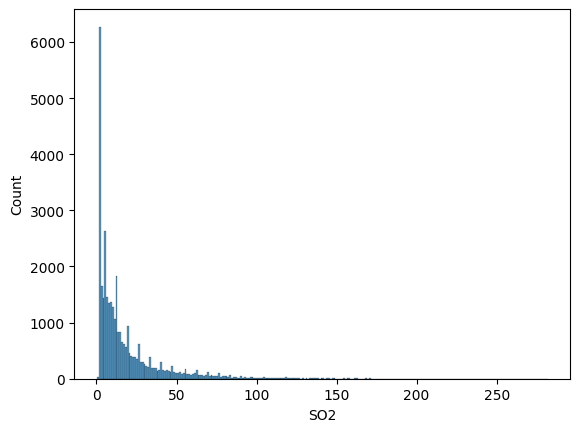

In [ ]:
sns.histplot(prsa_data.SO2)

<Axes: xlabel='NO2', ylabel='Density'>

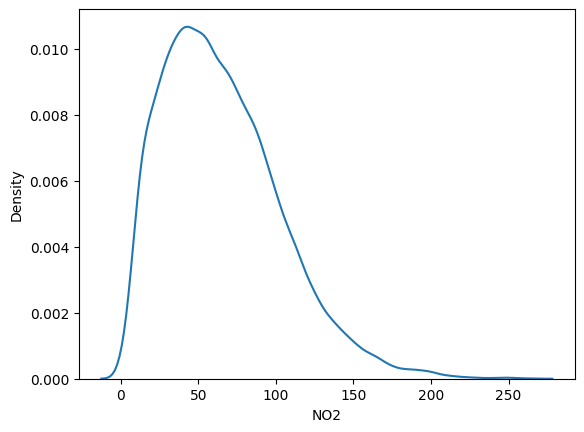

In [ ]:
sns.kdeplot(prsa_data.NO2)

<Axes: xlabel='CO', ylabel='Count'>

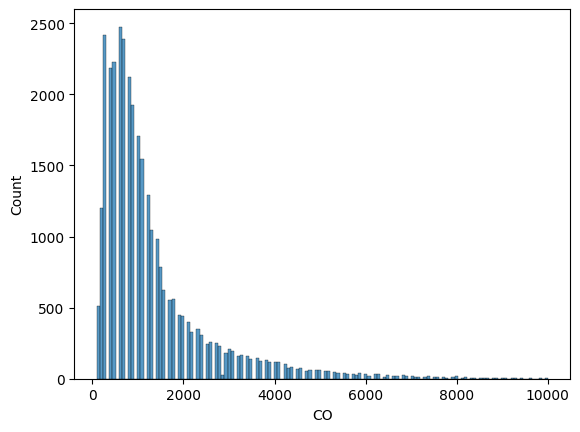

In [ ]:
sns.histplot(prsa_data.CO)

<Axes: xlabel='O3', ylabel='Count'>

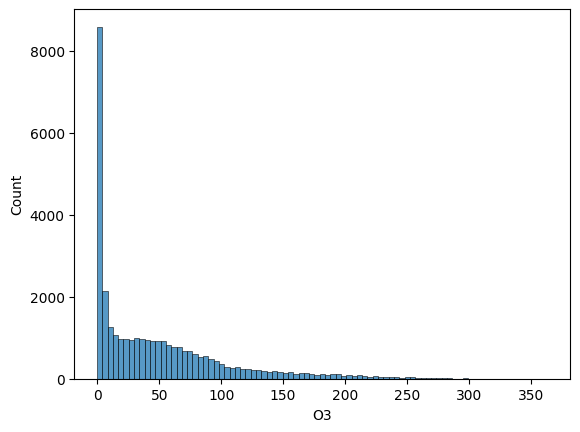

In [ ]:
sns.histplot(prsa_data.O3)

<Axes: xlabel='PRES', ylabel='Count'>

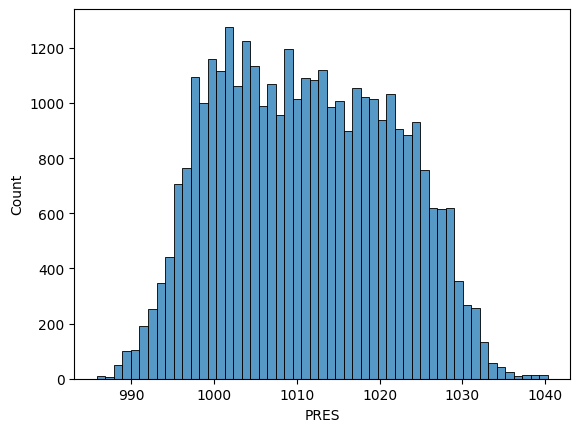

In [ ]:
sns.histplot(prsa_data.PRES)

<Axes: xlabel='RAIN', ylabel='Count'>

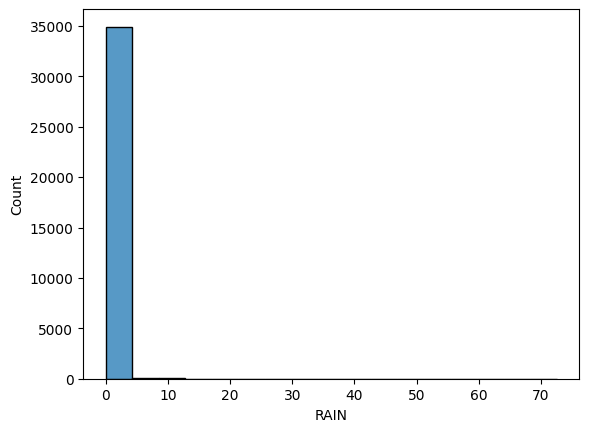

In [ ]:
sns.histplot(prsa_data.RAIN)

<Axes: xlabel='WSPM', ylabel='Count'>

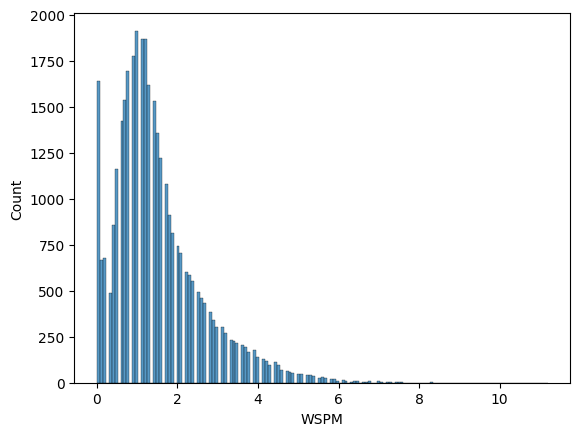

In [ ]:
sns.histplot(prsa_data.WSPM)

**Бинаризация атрибутов**

In [ ]:
# процесс преобразования числовых или категориальных атрибутов в бинарные атрибуты

In [ ]:
prsa_data.RAIN[prsa_data.RAIN > 0]

267      0.1
268      0.4
269      0.1
270      0.9
271      0.9
        ... 
34891    0.2
34892    0.7
34893    0.9
34894    0.4
34895    0.2
Name: RAIN, Length: 1436, dtype: float64

In [ ]:
is_rain = np.array(prsa_data.RAIN)
is_rain[is_rain > 0] = 1
prsa_data['IS_RAIN'] = is_rain
prsa_data.drop(['RAIN'], axis=1, inplace=True)
prsa_data.describe()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,WSPM,IS_RAIN
count,35064.000000,35064.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35050.000000,35044.000000
mean,17531.500000,17532.500000,18.376481,65.258789,1319.353513,48.873754,1011.097536,1.501215,0.040977
std,10122.249256,10122.249256,22.609648,37.996088,1268.114331,55.113576,10.355247,1.104472,0.198240
min,0.000000,1.000000,0.285600,1.642400,100.000000,-0.275160,985.900000,0.000000,0.000000
25%,8765.750000,8766.750000,4.000000,36.000000,500.000000,3.579219,1002.500000,0.800000,0.000000
50%,17531.500000,17532.500000,10.000000,60.000000,900.000000,31.945652,1010.800000,1.200000,0.000000
75%,26297.250000,26298.250000,23.000000,88.000000,1600.000000,72.876079,1019.400000,2.000000,0.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,11.200000,1.000000


**Визуализация связи атрибутов с целевой переменной**

<Axes: xlabel='SO2', ylabel='Density'>

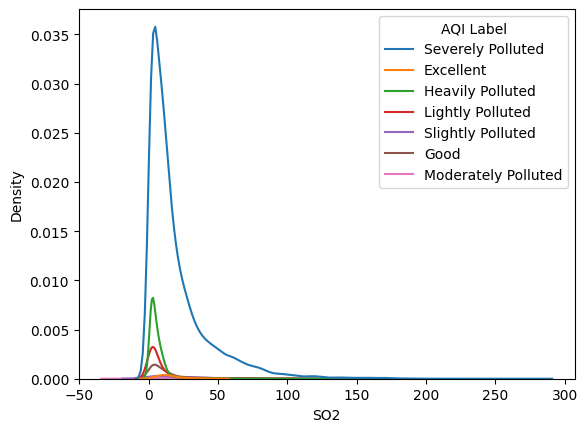

In [ ]:
sns.kdeplot(data=prsa_data, x="SO2", hue="AQI Label")

<Axes: xlabel='NO2', ylabel='Density'>

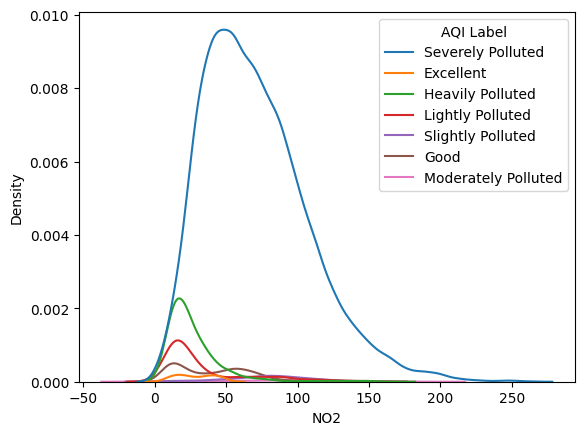

In [ ]:
sns.kdeplot(data=prsa_data, x="NO2", hue="AQI Label")

<ipython-input-198-c5b2a0db864b>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)


<Axes: xlabel='CO', ylabel='Density'>

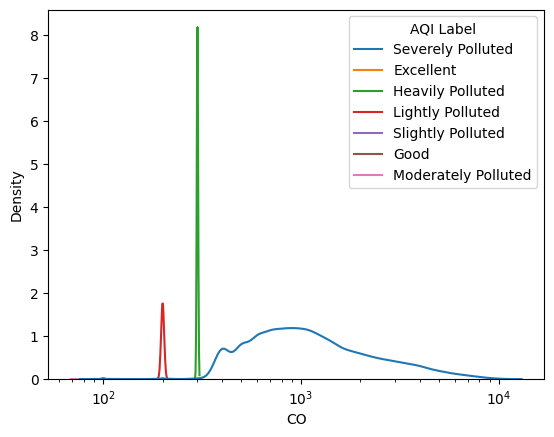

In [ ]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)

<Axes: xlabel='O3', ylabel='Density'>

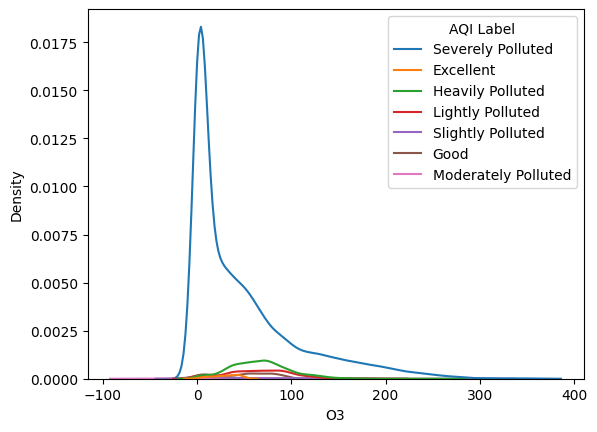

In [ ]:
sns.kdeplot(data=prsa_data, x="O3", hue="AQI Label")

<Axes: xlabel='PRES', ylabel='Density'>

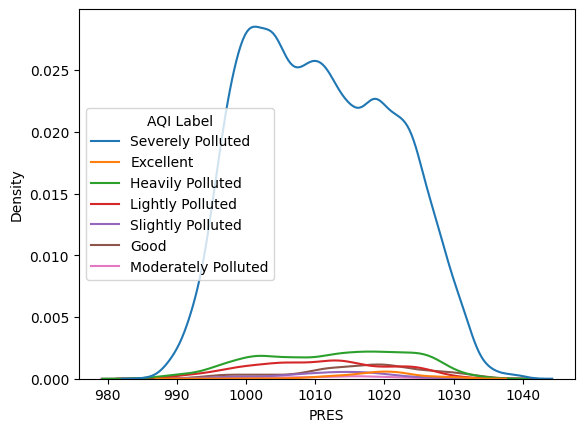

In [ ]:
sns.kdeplot(data=prsa_data, x="PRES", hue="AQI Label")

**Группировка численных значений**

In [ ]:
bin_ranges = [0, 250, 320, 10000]
bin_names = [1, 2, 3]
prsa_data['CO_bin_custom_label'] = pd.cut(np.array(prsa_data['CO']),
                                               bins=bin_ranges, labels=bin_names)
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,NaN
4,4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


In [ ]:
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].values.add_categories(0)
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].fillna(0).astype(int)
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,0
4,4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


**Удаление экстремальных значений**

клиппинг(заменяем экстремальные значения атрибута граничным)

In [ ]:
prsa_data.PRES[prsa_data.PRES <= 992] = 992
prsa_data.PRES[prsa_data.PRES >= 1034] = 1034

<ipython-input-203-5a60bf876b2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prsa_data.PRES[prsa_data.PRES <= 992] = 992
<ipython-input-203-5a60bf876b2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prsa_data.PRES[prsa_data.PRES >= 1034] = 1034


**Заполнение пропусков**

<Axes: >

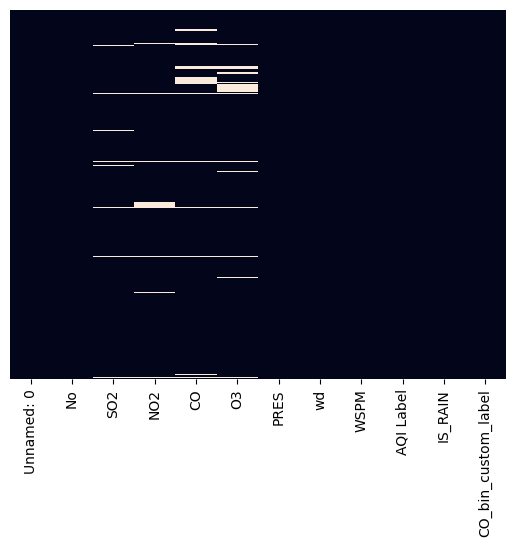

In [ ]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [ ]:
undef = prsa_data.isnull().sum(axis=1)
undef[undef >= 2]

3        2
276      3
435      2
459      2
555      2
        ..
34880    4
34883    4
34885    4
35029    2
35030    2
Length: 884, dtype: int64

In [ ]:
prsa_data = prsa_data.drop(undef[undef >= 2].index, axis=0)

<Axes: >

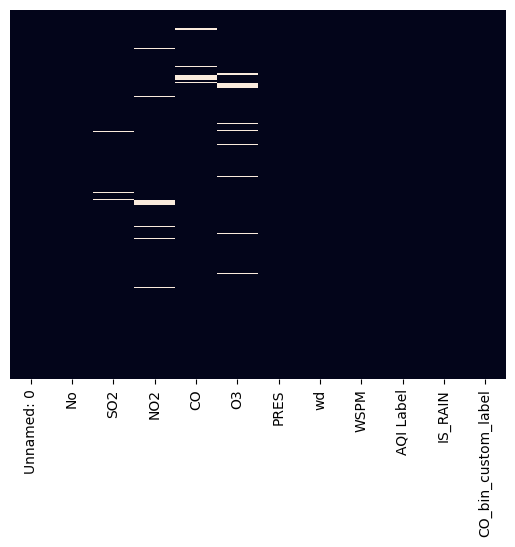

In [ ]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [ ]:
prsa_data.isnull().sum()

Unnamed: 0                0
No                        0
SO2                     281
NO2                     702
CO                     1028
O3                     1300
PRES                      0
wd                        0
WSPM                      0
AQI Label                 0
IS_RAIN                   0
CO_bin_custom_label       0
dtype: int64

In [ ]:
prsa_data.SO2 = prsa_data.SO2.fillna(prsa_data.PRES.mean())

In [ ]:
filler = prsa_data.O3[prsa_data.O3.isna()]

In [ ]:
filler = prsa_data.O3[~prsa_data.O3.isna()].sample(n=len(filler)).set_axis(filler.index)

In [ ]:
prsa_data.O3 = prsa_data.O3.fillna(filler)

**Округление атрибутов**

In [ ]:
prsa_data['O3'] = np.array(np.round((prsa_data['O3'])), dtype='int')
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.000000,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.000000,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,1011.055986,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,3
4,4,5,9.000000,NaN,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,2
5,5,6,8.000000,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,2


**Логарифмирование атрибутов**

In [ ]:
prsa_data.SO2 = np.log(prsa_data.SO2)

**Задания для самостоятельного выполнения**

# 1. При выполнении 3 и 5 заданий используйте другие методы визуализации. Найдите самый подходящий тип графика для каждого распределения.

In [ ]:
# наши столбцы SO2, NO2, CO, O3, PRES, WSPM
# Постройте визуализацию распределения каждого численного атрибута.

<Axes: xlabel='PRES'>

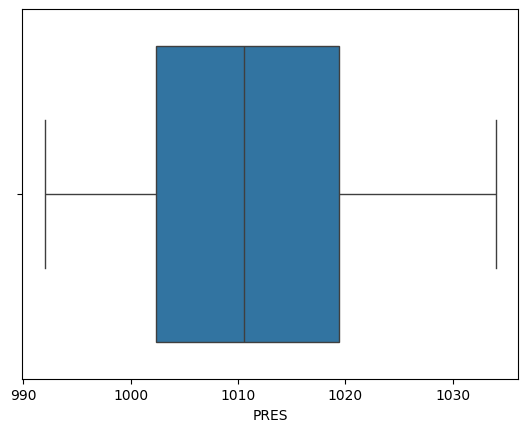

In [ ]:
# Boxplot показывает медиану, нижний и верхний квартили, а также выбросы для численных данных.
sns.boxplot(x=prsa_data['PRES'])

<Axes: xlabel='SO2'>

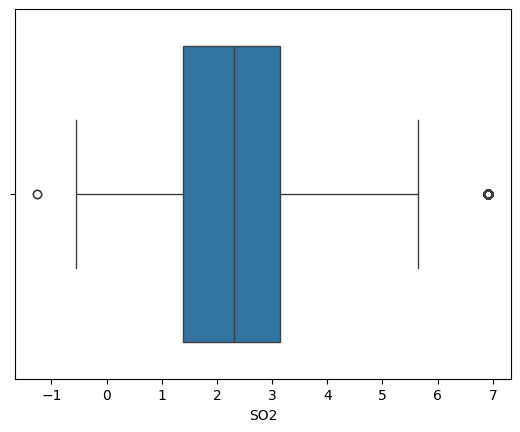

In [ ]:
sns.boxplot(x=prsa_data['SO2'])

<Axes: xlabel='NO2'>

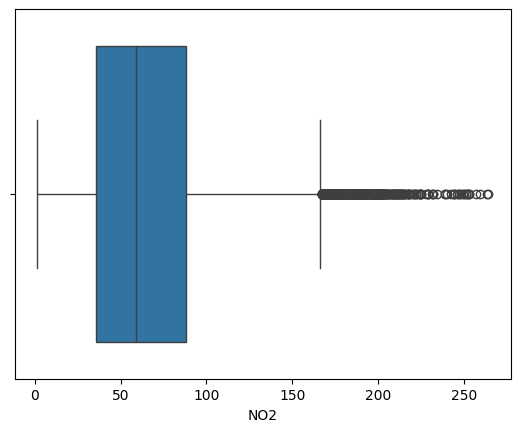

In [ ]:
sns.boxplot(x=prsa_data['NO2'])

<Axes: xlabel='CO'>

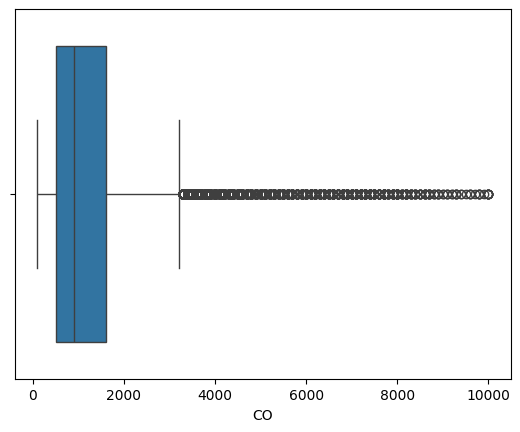

In [ ]:
sns.boxplot(x=prsa_data['CO'])

<Axes: xlabel='O3'>

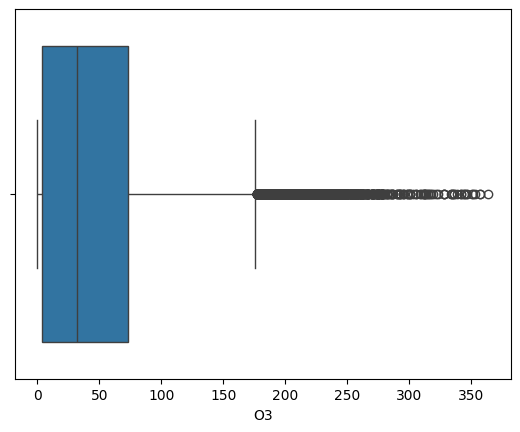

In [ ]:
sns.boxplot(x=prsa_data['O3'])

<Axes: xlabel='WSPM'>

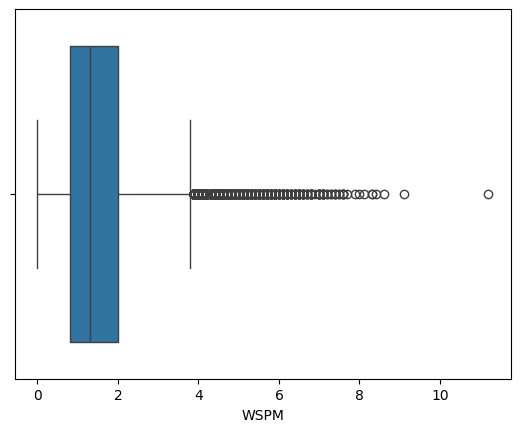

In [ ]:
sns.boxplot(x=prsa_data['WSPM'])

In [ ]:
# Постройте совместное распределение каждого признака вместе с целевой переменной.

<Axes: xlabel='NO2', ylabel='AQI Label'>

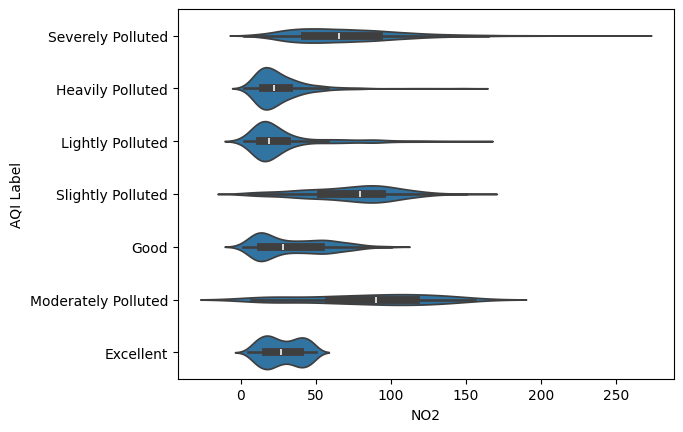

In [ ]:
# График виолончели сочетает в себе box plot (ящик с усами) и оценку плотности ядра (KDE).
# Ширина скрипки представляет собой плотность вероятности данных значений внутри категории
sns.violinplot(x='NO2', y='AQI Label', data=prsa_data)

<Axes: xlabel='SO2', ylabel='AQI Label'>

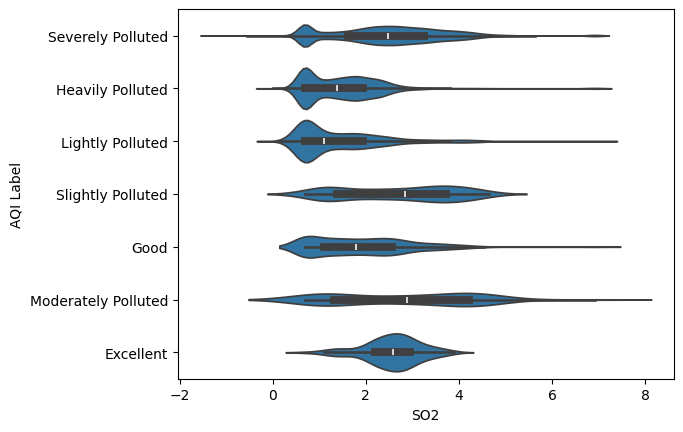

In [ ]:
sns.violinplot(x='SO2', y='AQI Label', data=prsa_data)

<Axes: xlabel='PRES', ylabel='AQI Label'>

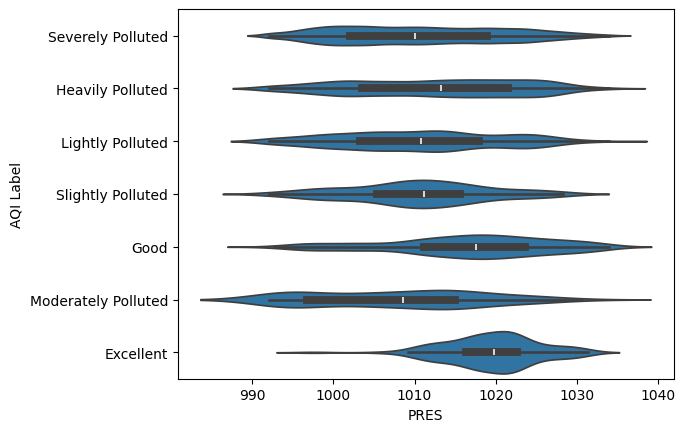

In [ ]:
sns.violinplot(x='PRES', y='AQI Label', data=prsa_data)

<Axes: xlabel='WSPM', ylabel='AQI Label'>

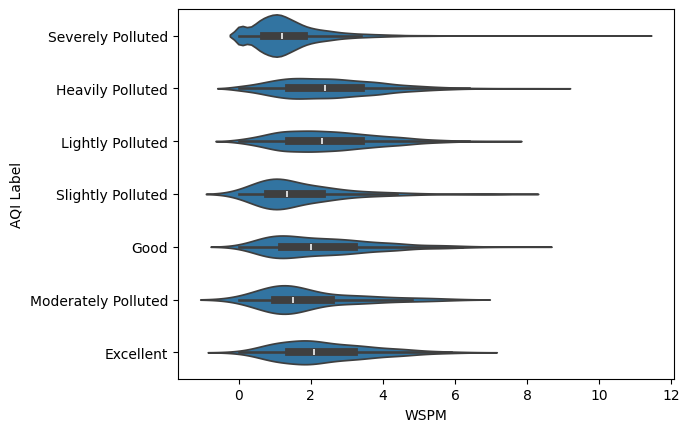

In [ ]:
sns.violinplot(x='WSPM', y='AQI Label', data=prsa_data)

<Axes: xlabel='O3', ylabel='AQI Label'>

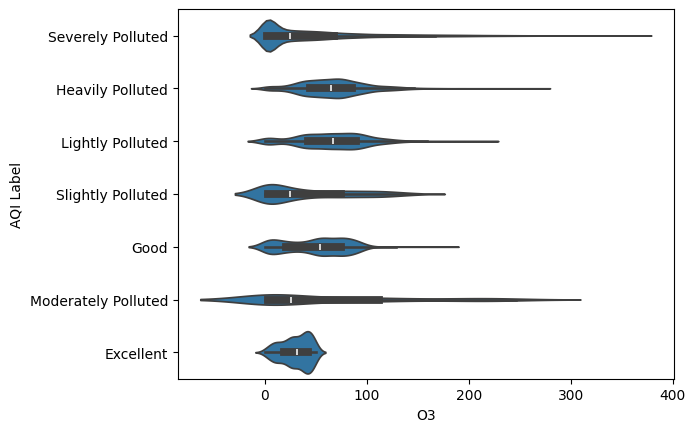

In [ ]:
sns.violinplot(x='O3', y='AQI Label', data=prsa_data)

# 2. При выполнении 6 задания мы явно подбирали руками границы диапазона для клиппинга. Реализуйте адаптивный клиппинг через процентили.

In [ ]:
prsa_data.head(3)

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,1.791759,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,1.791759,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,6.918751,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,3


In [ ]:
# мы не поработали с численными столбцами SO2, NO2, O3, WSPM
# клиппинг-заменяем экстремальные значения атрибута граничным
# очень редкие значения далеко от среднего или медианного значения
# их очень мало, они сильно отличаются от основной массы объектов

<Axes: xlabel='SO2', ylabel='Count'>

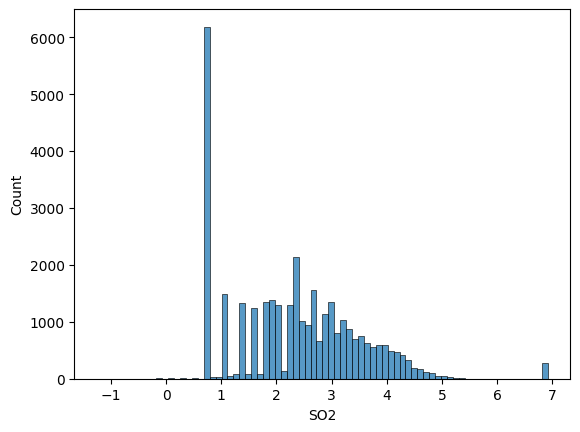

In [ ]:
sns.histplot(prsa_data.SO2)

<Axes: xlabel='NO2', ylabel='Count'>

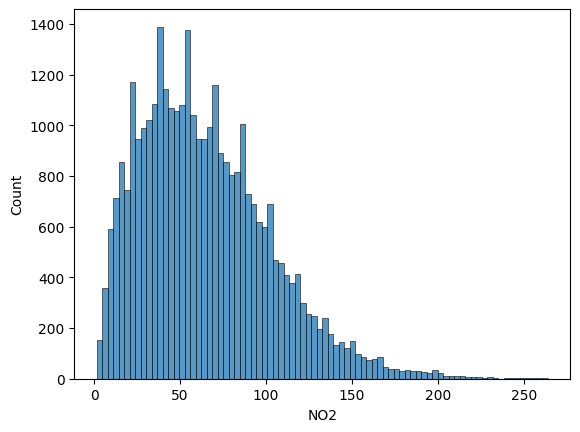

In [ ]:
sns.histplot(prsa_data.NO2)

<Axes: xlabel='O3', ylabel='Count'>

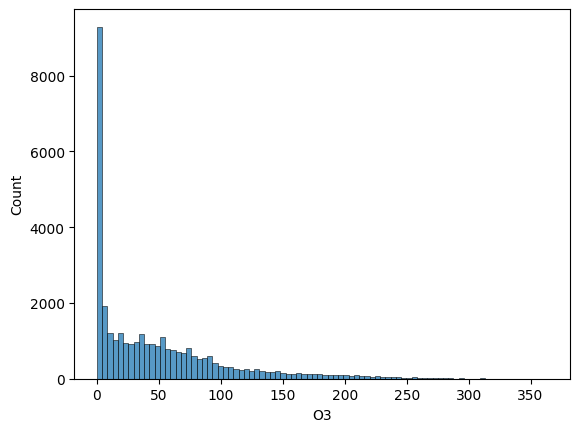

In [ ]:
sns.histplot(prsa_data.O3)

<Axes: xlabel='WSPM', ylabel='Count'>

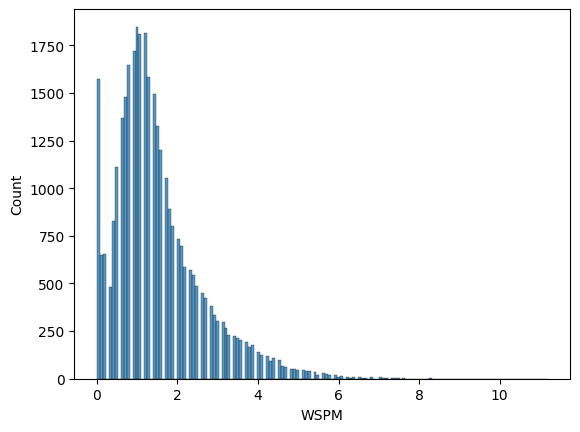

In [ ]:
sns.histplot(prsa_data.WSPM)

In [ ]:
# Функция quantile используется для определения границ клиппинга
# функция clip - для ограничения значений в указанных границах

columns = ['SO2', 'NO2', 'O3', 'WSPM']

for col in columns:
    lower, upper = prsa_data[col].quantile([0.01, 0.99])
    prsa_data[col] = prsa_data[col].clip(lower, upper)

<Axes: xlabel='SO2', ylabel='Count'>

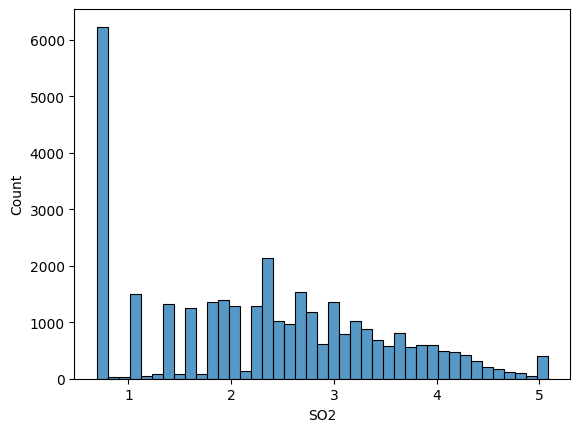

In [ ]:
sns.histplot(prsa_data.SO2)

<Axes: xlabel='NO2', ylabel='Count'>

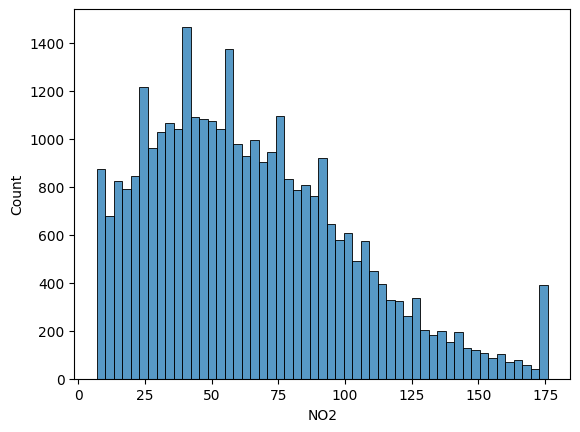

In [ ]:
sns.histplot(prsa_data.NO2)

<Axes: xlabel='O3', ylabel='Count'>

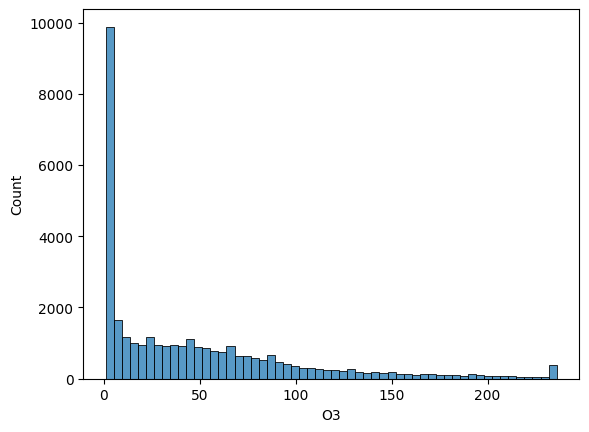

In [ ]:
sns.histplot(prsa_data.O3)

<Axes: xlabel='WSPM', ylabel='Count'>

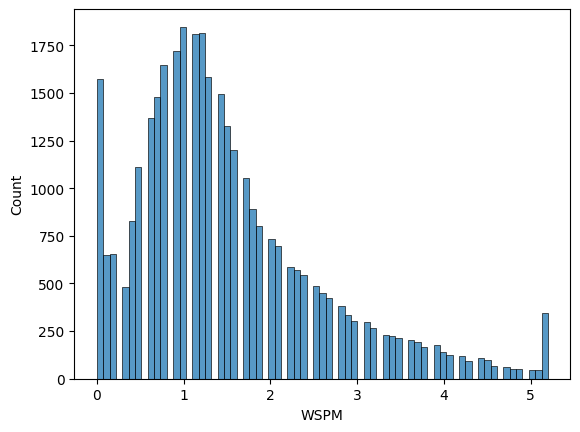

In [ ]:
sns.histplot(prsa_data.WSPM)

# 3. Избавьтесь от оставшихся пропусков в данных. Самостоятельно выберите метод.

In [ ]:
prsa_data.isnull().sum()

Unnamed: 0                0
No                        0
SO2                       0
NO2                     702
CO                     1028
O3                        0
PRES                      0
wd                        0
WSPM                      0
AQI Label                 0
IS_RAIN                   0
CO_bin_custom_label       0
dtype: int64

In [ ]:
df['NO2'].fillna(df['NO2'].mean(), inplace=True)

In [ ]:
df['CO'].fillna(df['CO'].mean(), inplace=True)

In [ ]:
df['O3'].fillna(df['O3'].mean(), inplace=True)

In [ ]:
df['O3'].isnull().sum()

0

In [ ]:
df['O3']

0        51.577659
1        50.403851
2        54.923321
4        54.296608
5        53.785194
           ...    
35059    81.053452
35060    44.645126
35061    47.567265
35062    49.764297
35063    11.194135
Name: O3, Length: 34180, dtype: float64

# 4. Проведите нормализацию численных признаков. Выберите наиболее подходящий вид нормализации для каждого признака.

In [ ]:
df = prsa_data[['SO2', 'NO2', 'CO', 'O3', 'PRES', 'WSPM']]

In [ ]:
df.head()

,SO2,NO2,CO,O3,PRES,WSPM
0,1.791759,28.0,400.0,52,1023.0,4.4
1,1.791759,28.0,400.0,50,1023.2,4.7
2,5.081404,19.0,400.0,55,1023.5,5.2
4,2.197225,NaN,300.0,54,1025.2,2.0
5,2.079442,17.0,300.0,54,1025.6,3.7


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['SO2_new'] = scaler.fit_transform(df[['SO2']])
df['NO2_new'] = scaler.fit_transform(df[['NO2']])
df['CO_new'] = scaler.fit_transform(df[['CO']])
df['O3_new'] = scaler.fit_transform(df[['O3']])
df['PRES_new'] = scaler.fit_transform(df[['PRES']])
df['WSPM_new'] = scaler.fit_transform(df[['WSPM']])

<ipython-input-247-b20dcbea575d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SO2_new'] = scaler.fit_transform(df[['SO2']])
<ipython-input-247-b20dcbea575d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NO2_new'] = scaler.fit_transform(df[['NO2']])
<ipython-input-247-b20dcbea575d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
df.head()

,SO2,NO2,CO,O3,PRES,WSPM,SO2_new,NO2_new,CO_new,O3_new,PRES_new,WSPM_new
0,1.791759,28.0,400.0,52,1023.0,4.4,-0.464079,-0.988131,-0.724676,0.063496,1.156648,2.685721
1,1.791759,28.0,400.0,50,1023.2,4.7,-0.464079,-0.988131,-0.724676,0.026431,1.176016,2.963806
2,5.081404,19.0,400.0,55,1023.5,5.2,2.406883,-1.229799,-0.724676,0.119093,1.205067,3.427282
4,2.197225,NaN,300.0,54,1025.2,2.0,-0.110218,NaN,-0.803500,0.100561,1.369694,0.461040
5,2.079442,17.0,300.0,54,1025.6,3.7,-0.213011,-1.283503,-0.803500,0.100561,1.408430,2.036856


In [ ]:
# Стандартизация (Z-score нормализация):
# Этот метод преобразует признаки так, что они имеют среднее значение 0 и стандартное отклонение 1.

# 5. Постройте кореллограмму по всем численным столбцам датасета. Сделайте вывод о значимости признаков.

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


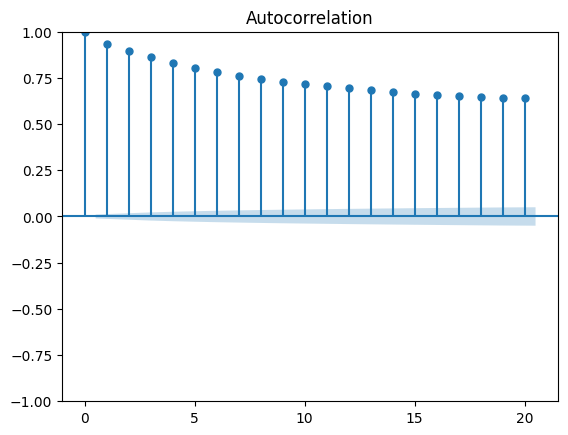

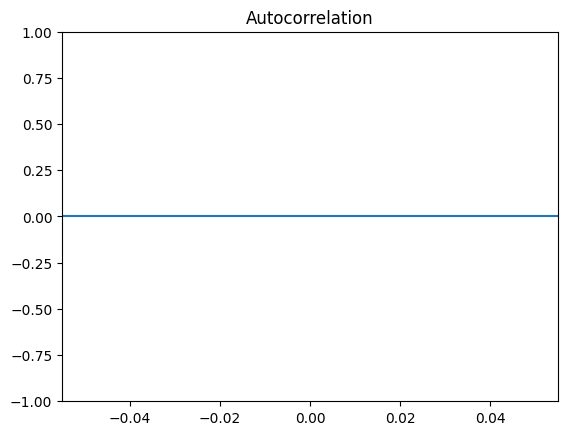

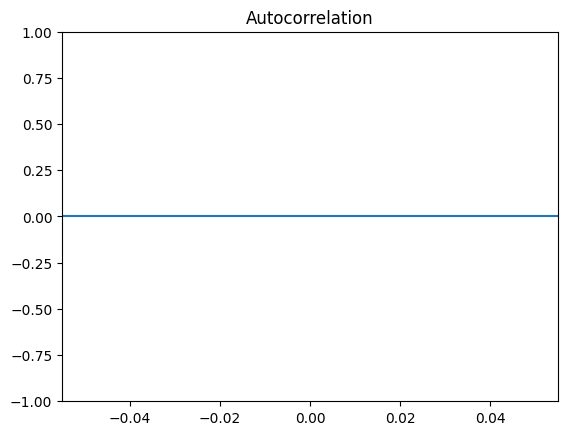

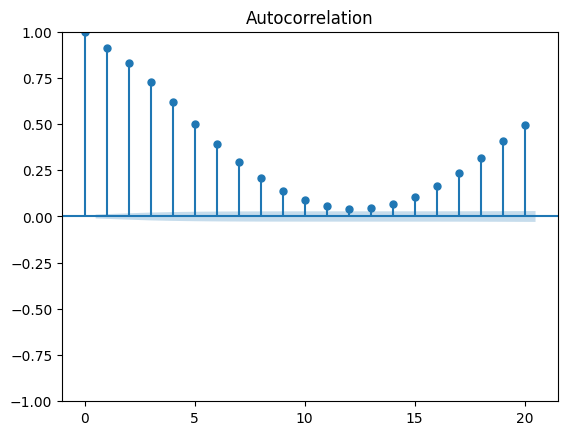

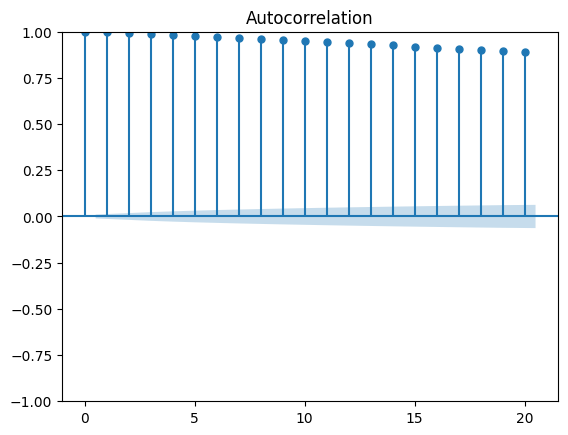

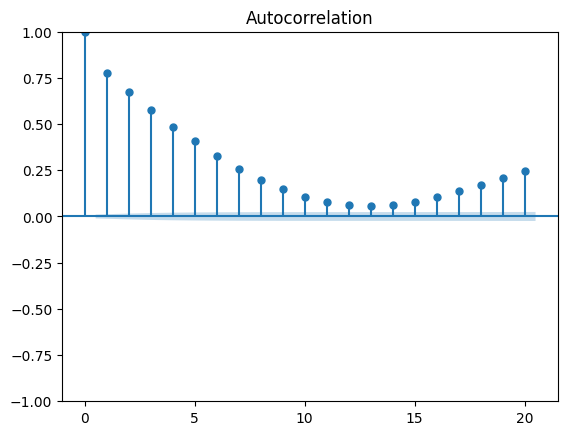

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
df = prsa_data[['SO2', 'NO2', 'CO', 'O3', 'PRES', 'WSPM']]
for column in df.columns:
        plot_acf(df[column], lags=20)

# 6. Визуализируйте связи между признаками. Сделайте вывод об их взаимозависимости.

<Axes: >

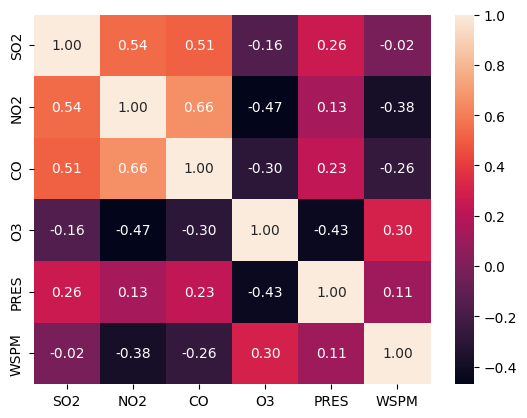

In [ ]:
df = prsa_data[['SO2', 'NO2', 'CO', 'O3', 'PRES', 'WSPM']]
sns.heatmap(df[[col for col in df.columns]].corr(), annot=True, fmt=".2f")